In [1]:
# Installing Pillow Libraries
# !pip install scikit-learn matplotlib Pillow

In [2]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn import svm
import pandas as pd
from KNN import KNNClassifier

In [3]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [4]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [5]:
dirpath = 'IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


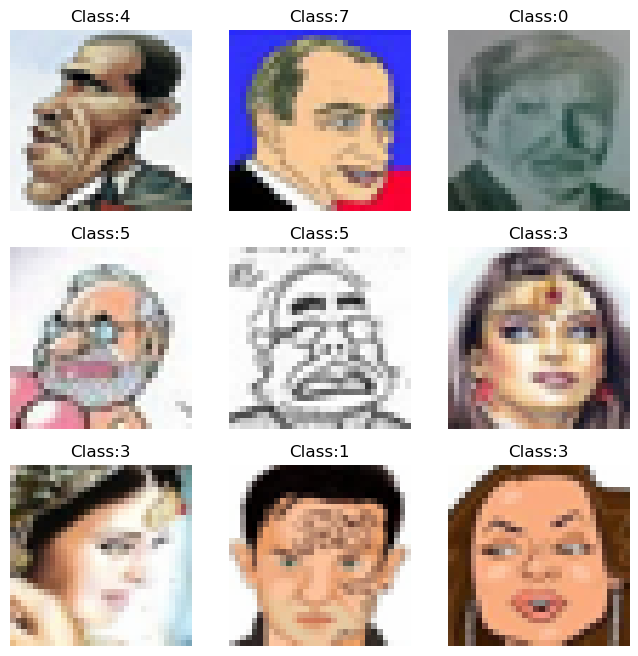

In [6]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],9)
display_images(X[ind,...],y[ind], row=3,col=3)

# Problem 1

Perform dimensionality reduction on the IIIT-CFW dataset, varying the number of principle components. We have given the script to pre-process the data and to get the necessary information from the image Script.

In [7]:
def PCA(X, K):
    N, D = X.shape
    mean = np.mean(X, axis=0)
    centered_X = X - mean

    covariance_matrix = np.cov(centered_X, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    top_eigenvectors = eigenvectors[:, :K]

    total_variance = np.sum(eigenvalues)
    explained_variance = np.cumsum(eigenvalues) / total_variance

    reduced = np.dot(centered_X, top_eigenvectors)

    return reduced, top_eigenvectors, explained_variance

In [8]:
K = 1000
components, top_eigenvectors, explained_variance = PCA(X.reshape(N, -1), K)

Plot the the relationship between the cumulative explained variance and
the number of principal components. The x-axis of the plot typically
represents the number of principal components, and the y-axis represents
the cumulative explained variance

/home/prakhar/miniconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


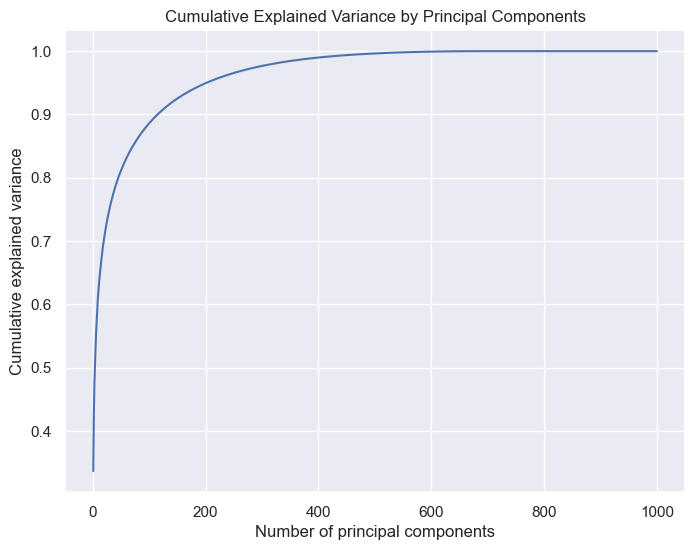

In [21]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, K + 1), explained_variance[:K], linestyle='-')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

Perform the dimensionality reduction on features that you have used for
assignment 1 (pictionary dataset) and show the metrics you have shown for
the assignment 1. Compare the results and write down the observations
in the MARKDOWN

In [24]:
enc = 'VIT'
dis = 'cosine'
k = 39

knn = KNNClassifier(k = k, distance_metric = dis, encoder = enc)
pred_and_scores = knn.get_inference_and_scores()
# print(enc, dis, k)
# print(enc, dis, k, pred_and_scores['dict']['accuracy'])
print("Accuracy : ", pred_and_scores['dict']['accuracy'])
print("macro avg:",end="\n")
print(pred_and_scores['dict']['macro avg']['precision'], pred_and_scores['dict']['macro avg']['recall'], pred_and_scores['dict']['macro avg']['f1-score'])

print("weighted avg:",end="\n")
print(pred_and_scores['dict']['weighted avg']['precision'], pred_and_scores['dict']['weighted avg']['recall'], pred_and_scores['dict']['weighted avg']['f1-score'])

Accuracy :  0.25333333333333335
macro avg:
0.12505097292302372 0.1647126436781609 0.12791589938595382
weighted avg:
0.21283276299723666 0.25333333333333335 0.2106692839324418


In [25]:
# was reading the data.npy file in the constructor of KNNClassifier class
# so, I had to change the constructor to take the function PCA and K as a parameter
# and then call the function PCA in the constructor
from KNNPCA import KNNClassifierPCA
enc = 'VIT'
dis = 'cosine'
k = 39

knn = KNNClassifierPCA(k = k, distance_metric = dis, encoder = enc, PCA=PCA, K = 40)
pred_and_scores = knn.get_inference_and_scores()
# print(enc, dis, k)
# print(enc, dis, k, pred_and_scores['dict']['accuracy'])
print("Accuracy : ", pred_and_scores['dict']['accuracy'])
print("macro avg:",end="\n")
print(pred_and_scores['dict']['macro avg']['precision'], pred_and_scores['dict']['macro avg']['recall'], pred_and_scores['dict']['macro avg']['f1-score'])

print("weighted avg:",end="\n")
print(pred_and_scores['dict']['weighted avg']['precision'], pred_and_scores['dict']['weighted avg']['recall'], pred_and_scores['dict']['weighted avg']['f1-score'])

Accuracy :  0.28
macro avg:
0.16963845252435855 0.18884627676573987 0.15873306410219162
weighted avg:
0.2671980056980057 0.28 0.24861856661856657


# PCA vs. No PCA Evaluation

In a machine learning experiment, the performance of a model both with and without Principal Component Analysis (PCA) dimensionality reduction was assessed. The following evaluation metrics were collected for each scenario:

## Without PCA

- Accuracy: 0.2533
- Macro Avg Precision: 0.1251
- Macro Avg Recall: 0.1647
- Macro Avg F1 Score: 0.1279
- Weighted Avg Precision: 0.2128
- Weighted Avg Recall: 0.2533
- Weighted Avg F1 Score: 0.2107

## With PCA

- Accuracy: 0.28
- Macro Avg Precision: 0.1696
- Macro Avg Recall: 0.1888
- Macro Avg F1 Score: 0.1587
- Weighted Avg Precision: 0.2672
- Weighted Avg Recall: 0.28
- Weighted Avg F1 Score: 0.2486

### Observations

1. **Accuracy Improvement:** With PCA, there is a slight improvement in accuracy compared to without PCA (0.28 vs. 0.2533). This suggests that dimensionality reduction through PCA has helped the model perform slightly better in terms of overall accuracy.

2. **Precision and Recall:** Both macro and weighted average precision and recall values have improved with PCA. This means that the model's ability to correctly classify different classes has improved after dimensionality reduction.

3. **F1 Score:** The F1 scores have shown mixed results. While the macro F1 score decreased with PCA, the weighted average F1 score improved. The macro F1 score accounts for class imbalances, so it might decrease if PCA affects the model's ability to handle imbalanced classes. On the other hand, the weighted average F1 score improved, indicating better overall performance.

In summary, dimensionality reduction using PCA has led to a modest improvement in accuracy and an overall improvement in precision and recall metrics. However, the effect on the F1 score depends on whether you prioritize macro or weighted average F1. It's important to note that PCA can help reduce the risk of overfitting and speed up training for high-dimensional datasets, but it might not always lead to better results, as observed in the case of the macro F1 score. The choice of whether to use PCA should consider the specific goals of your machine learning task and the characteristics of your dataset.


In [8]:


X = X.reshape(N, -1)
N, D = X.shape

# Center the data
mean = np.mean(X, axis=0)
centered_X = X - mean

# Calculate the covariance matrix
covariance_matrix = np.cov(centered_X, rowvar=False)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]    

In [12]:
# Observe the impact of dimensionality reduction on the dataset. Use a clas-
# sifier on the dataset pre and post-dimensionality reduction (if the number
# of features of the dataset is n, perform dimensionality reduction varying
# the principal components from 1 to n) and note the accuracies of the
# classifier. You are free to use external libraries for the classifier.

X_train, X_test, y_train, y_test = train_test_split(X.reshape(N, -1), y, test_size=0.2, random_state=42, stratify=y)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
pre_acc = clf.score(X_test, y_test)


post_acc = []
for K in tqdm(range(1, 3072+1), desc="Processing"):
    top_eigenvectors = eigenvectors[:, :K]
    reduced = np.dot(centered_X, top_eigenvectors)
    X_train, X_test, y_train, y_test = train_test_split(reduced, y, test_size=0.2, random_state=42, stratify=y)
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    post_acc.append([K ,clf.score(X_test, y_test)])
post_acc = np.array(post_acc)


Processing: 100%|██████████| 3072/3072 [21:54<00:00,  2.34it/s]


In [13]:
post_acc = np.array(post_acc)

In [16]:
np.save('post_acc.npy', post_acc)

In [14]:
print("Pre-PCA Accuracy:", pre_acc)

Pre-PCA Accuracy: 0.5925925925925926


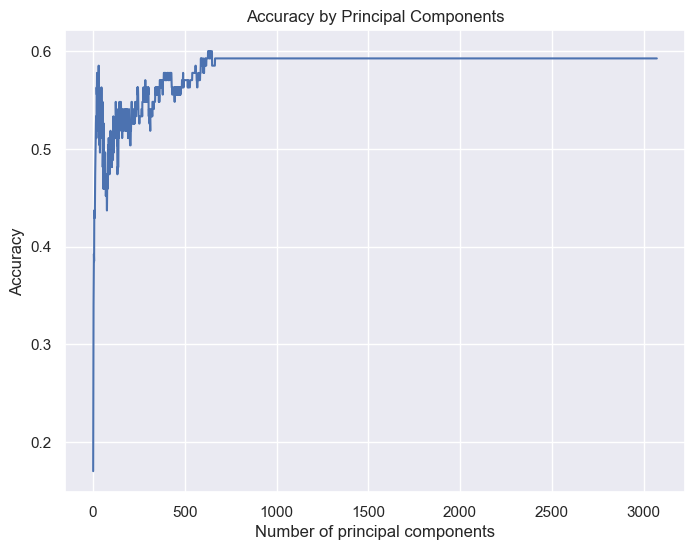

In [15]:
# plot K vs accuracy using sns
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
plt.plot(post_acc[:, 0], post_acc[:, 1], linestyle='-')
plt.xlabel('Number of principal components')
plt.ylabel('Accuracy')
plt.title('Accuracy by Principal Components')
plt.show()

# 1.2


In [6]:
drawer = pd.read_csv("smai_assignment_pictionary/drawer_attributes.csv")
guesser = pd.read_csv("smai_assignment_pictionary/guesser_attributes.csv")

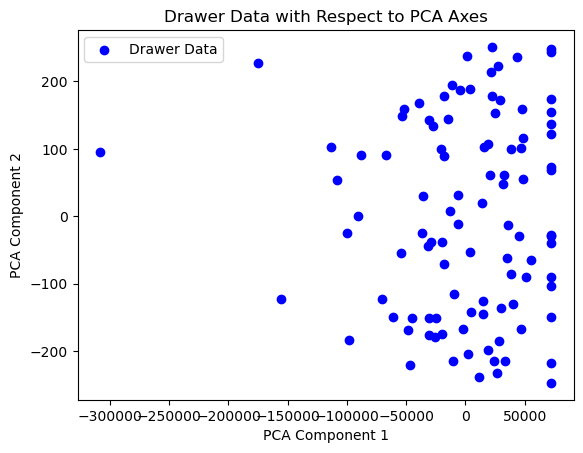

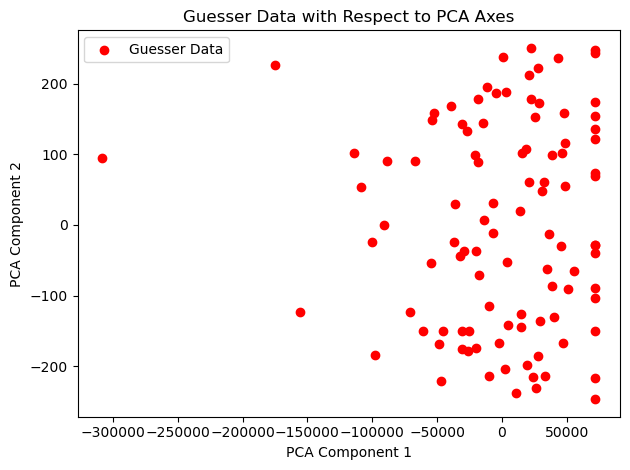

In [62]:
guesser_pca, _, _ = PCA(drawer.values, 3)
drawer_pca, _, _ = PCA(guesser.values, 3)

# plt.figure(10, 4)
# plt.subplot(1, 2, 1)
plt.scatter(guesser_pca[:,0], guesser_pca[:, 1], c = 'blue', label = 'Drawer Data')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Drawer Data with Respect to PCA Axes")
plt.legend()

plt.show()


# plt.subplot(1, 2, 2)
plt.scatter(guesser_pca[:, 0], guesser_pca[:, 1], c='red', label="Guesser Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Guesser Data with Respect to PCA Axes")
plt.legend()

plt.tight_layout()
plt.show()

Each principal component obtained from PCA represents a significant pattern or direction in the data. PC1 captures the most variance, PC2 captures the second most, and so on. These components help reduce dimensionality and reveal the underlying data structure. For the drawer and guesser in the Pictionary Dataset, PC1 captures the most important drawing or guessing patterns, while PC2 captures the second most important.

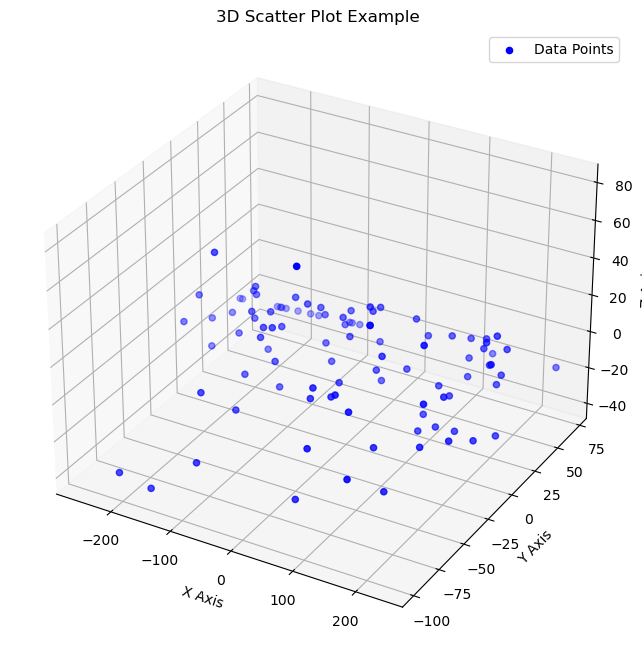

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create data for the 3D plot (you can replace this with your dataset)
# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(drawer_pca[:,0],drawer_pca[:,1], drawer_pca[:,2], c='b', marker='o', label='Data Points')

# Set labels for the axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Set a title for the plot
ax.set_title('3D Scatter Plot Example')

# Add a legend
ax.legend()

# Show the plot
plt.show()


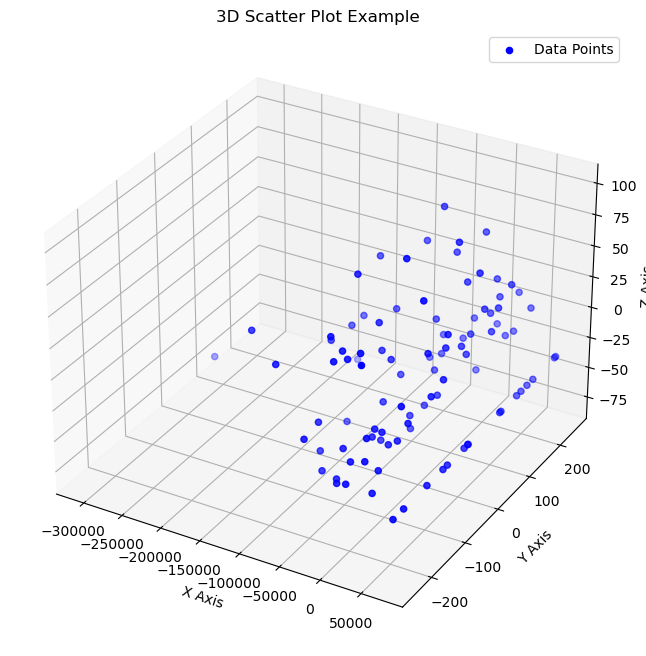

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create data for the 3D plot (you can replace this with your dataset)
# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(guesser_pca[:,0],guesser_pca[:,1], guesser_pca[:,2], c='b', marker='o', label='Data Points')

# Set labels for the axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Set a title for the plot
ax.set_title('3D Scatter Plot Example')

# Add a legend
ax.legend()

# Show the plot
plt.show()
